# 16 Data Types
File(s) needed: Taiwan_cell_small.csv, billboard.csv

We have seen there are different data types in pandas and Python. This notebook will cover what they are and how to convert between most types. We will spend more time with strings in the next notebook. Dates and times will come in a couple of weeks.

The table below shows the different data types available in pandas. It also shows how the pandas types compare to the native Python types.

|<p style="text-align:left;">pandas Data Type</p>|<p style="text-align:left;">Python Data Type</p>|<p style="text-align:left;">Description</p>|
| --- | --- | --- |
|<p style="text-align:left;font-family:Courier New">object</p>|<p style="text-align:left;font-family:Courier New">string</p> |<p style="text-align:left;">Most common data type and the default type.</p>|
|<p style="text-align:left;font-family:Courier New">int64</p>|<p style="text-align:left;font-family:Courier New">int</p>|<p style="text-align:left;">Whole numbers</p>|
|<p style="text-align:left;font-family:Courier New">float64</p>|<p style="text-align:left;font-family:Courier New">float</p>|<p style="text-align:left;">Decimal numbers</p>|
|<p style="text-align:left;font-family:Courier New">bool</p>|<p style="text-align:left;font-family:Courier New">bool</p>|<p style="text-align:left;">True or False values only</p>|
|<p style="text-align:left;font-family:Courier New">category</p>|<p style="text-align:left;font-family:Courier New">NA</p>|<p style="text-align:left;">Holds a finite list of values used as categorical data.</p>|
|<p style="text-align:left;font-family:Courier New">datetime64</p>|<p style="text-align:left;font-family:Courier New">datetime</p>|<p style="text-align:left;">Dates and time values. Part of a library and must be imported.</p>|
|<p style="text-align:left;font-family:Courier New">timedelta</p>|<p style="text-align:left;font-family:Courier New">NA</p>|<p style="text-align:left;">Difference between two datetimes</p>|

It's important to understand about the type of data stored in a column of a data frame because the data type determines the kinds of functions or calculations that can be performed on a column. It may become necessary, then, to convert between data types in order to conduct your analysis. You can do your conversion(s) when the data is loaded or convert as needed later.

We'll use the _tips_ dataset from seaborn to work with data types.

We use the `astype()` method as a generic way to convert from one type of data to another.

###### Even though we can change the type "in place," we will usually create a new column in the dataframe to hold the converted data. Why?

In [1]:
# import libraries and load built-in data
import pandas as pd
import seaborn as sns

tips=sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


# Converting to strings


In [8]:
# Convert category variable sex to string
tips['sex_str']=tips['sex'].astype(str)

In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.2+ KB


In [12]:
tips['tip_str']=tips['tip'].astype(str)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
 8   tip_str     244 non-null    object  
dtypes: category(4), float64(2), int64(1), object(2)
memory usage: 11.1+ KB


# Converting to numeric values
You can have values with number characters that get loaded as categories or objects. You can also create an object variable with numeric values by modifying other object data. In ny case, if you need to be able to do calculations with numeric data, you will convert it to either `int64` or `float64` type.

The `astype()` can still be used in this case, but there is a potential problem in big data sets. A non-numeric value will trigger an erro message. It is better to use the pandas `to_numeric()` method so we can specify how to handle that error.

The `errors` parameter has three options:
1. `raise` - raises an error message. (This is the default.)
2. `coerce` - return `NaN` values for values it can't convert to numbers.
3. `ignore` - does nothing if there is a nonnumeric value, but at least it doesn't trigger an error message.

For our purposes, we will use `coerce` if we think there might be some nonnumeric values. As an example, lets add some problem values to the `tips` data and then convert that column to numeric.

In [13]:
# subset the tips data
tips_sub = tips.head(15)

# add some null values, NaN, and the string 'missing'
tips_sub.loc[[1,4,8], 'size'] = 'NaN'
tips_sub.loc[[3, 14], 'size'] = ''
tips_sub.loc[[2,6,8], 'total_bill'] = 'missing'

tips_sub

C:\Users\victo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,total_bill,tip,sex,smoker,day,time,size,sex_str,tip_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,1.01
1,10.34,1.66,Male,No,Sun,Dinner,NaN,Male,1.66
2,missing,3.50,Male,No,Sun,Dinner,3,Male,3.5
3,23.68,3.31,Male,No,Sun,Dinner,,Male,3.31
4,24.59,3.61,Female,No,Sun,Dinner,NaN,Female,3.61
5,25.29,4.71,Male,No,Sun,Dinner,4,Male,4.71
6,missing,2.00,Male,No,Sun,Dinner,2,Male,2.0
7,26.88,3.12,Male,No,Sun,Dinner,4,Male,3.12
8,missing,1.96,Male,No,Sun,Dinner,NaN,Male,1.96
9,14.78,3.23,Male,No,Sun,Dinner,2,Male,3.23


In [14]:
# Look at the dtypes results. Both columns are now objects.
tips_sub.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size            object
sex_str         object
tip_str         object
dtype: object

In [16]:
# Use astype(float) to change the column type for total_bill - error message
tips_sub['total_bill'].astype(float)

ValueError: could not convert string to float: 'missing'

In [17]:
# Use astype(int) to change the column type for size - error message
tips_sub['size'].astype(int)

ValueError: invalid literal for int() with base 10: 'NaN'

In [40]:
tips_sub.columns[[0,6]]

array(['total_bill', 'size'], dtype=object)

In [34]:
# Now, use to_numeric and errors='coerce' to try the same thing
pd.to_numeric(tips_sub.columns[[0,6]],errors='coerce')

Float64Index([nan, nan], dtype='float64')

Of course, now _size_ is a float when we really want it to be an integer. We can use the `downcast` parameter so the `to_numeric` method sets the converted column to the smallest numeric type it can.

First we will restore the text values to the size column, then run `to_numeric` with both the `errors` and `downcast` options set.

In [41]:
# Restore the text to the size column
tips_sub = tips.head(15)
tips_sub.loc[[1,4,8], 'size'] = 'NaN'
tips_sub.loc[[3, 14], 'size'] = ''

tips_sub.dtypes
tips_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  15 non-null     float64 
 1   tip         15 non-null     float64 
 2   sex         15 non-null     category
 3   smoker      15 non-null     category
 4   day         15 non-null     category
 5   time        15 non-null     category
 6   size        15 non-null     object  
 7   sex_str     15 non-null     object  
 8   tip_str     15 non-null     object  
dtypes: category(4), float64(2), object(3)
memory usage: 1.2+ KB


C:\Users\victo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [83]:
# Convert the size column to an integer dtype
tips_sub['size'].astype(int)

ValueError: invalid literal for int() with base 10: 'NaN'

In [85]:
# So it won't downcast because of the missing values. NaN is a float value.
# Lets replace the missing values, then convert to an integer type.
fill_values={'size':0}
tips_sub['size'].fillna(value=fill_values,inplace=True)

In [86]:
# Now, let's use astype to change size to integer
tips_sub['size']=tips_sub['size'].astype('int64')

ValueError: invalid literal for int() with base 10: 'NaN'

## Example: splitting mixed character data
Remember the last example from the "Tidy Data" notebook? Let's look at the results we got to see if we can clean it up a little more.

In [49]:
# Code copied from previous notebook to recreate our final tidy version 
#   of the Billboard ranking data
billboard = pd.read_csv('../MIS-3335/data/billboard.csv')
billboard_long = pd.melt(billboard,
                        id_vars=['year','artist','track','time','date.entered'],
                        var_name='week',
                        value_name='rank')

# Subset the track info and drop the duplicates
billboard_songs = billboard_long[['year','artist','track','time']]
billboard_songs = billboard_songs.drop_duplicates()

# Assign a unique ID number to each row and use it to match the song data to the ranking data
billboard_songs['track_id']=range(len(billboard_songs))
billboard_rankings = billboard_long.merge(billboard_songs,
                                        on=['year','artist','track','time'])

# Finally, get rid of the unneeded columns in the ranking data frame.
billboard_rankings = billboard_rankings[['track_id','date.entered','week','rank']]
billboard_rankings.head()

,track_id,date.entered,week,rank
0,0,2000-02-26,wk1,87.0
1,0,2000-02-26,wk2,82.0
2,0,2000-02-26,wk3,72.0
3,0,2000-02-26,wk4,77.0
4,0,2000-02-26,wk5,87.0


The column `week` contains mixed character data - both letters and numbers - and there is no reason it needs to. We would probably prefer to just have the numbers there. While we won't wnat to do any serious math with them, it does make it easier to do other things like sort the values. Plus, having 'wk' in the value adds no value.

Let's use the `strip` string method to get that data down to just the numeric characters.

In [61]:
# Add a new column with just the number part
billboard_rankings['week_num']=billboard_rankings['week'].str.strip('wk')
billboard_rankings

,track_id,date.entered,week,rank,week_num
0,0,2000-02-26,wk1,87.0,1
1,0,2000-02-26,wk2,82.0,2
2,0,2000-02-26,wk3,72.0,3
3,0,2000-02-26,wk4,77.0,4
4,0,2000-02-26,wk5,87.0,5
...,...,...,...,...,...
24087,316,2000-04-29,wk72,NaN,72
24088,316,2000-04-29,wk73,NaN,73
24089,316,2000-04-29,wk74,NaN,74
24090,316,2000-04-29,wk75,NaN,75


In [65]:
# Convert the week_num column to integer type, then delete the
#   unneeded week column
billboard_rankings['week_num']=pd.to_numeric(billboard_rankings['week_num'],downcast='integer')
billboard_rankings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24092 entries, 0 to 24091
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      24092 non-null  int32  
 1   date.entered  24092 non-null  object 
 2   week          24092 non-null  object 
 3   rank          5307 non-null   float64
 4   week_num      24092 non-null  int8   
dtypes: float64(1), int32(1), int8(1), object(2)
memory usage: 870.5+ KB


In [67]:
billboard_rankings.drop(['week'],axis=1,inplace=True)

In [68]:
billboard_rankings

,track_id,date.entered,rank,week_num
0,0,2000-02-26,87.0,1
1,0,2000-02-26,82.0,2
2,0,2000-02-26,72.0,3
3,0,2000-02-26,77.0,4
4,0,2000-02-26,87.0,5
...,...,...,...,...
24087,316,2000-04-29,NaN,72
24088,316,2000-04-29,NaN,73
24089,316,2000-04-29,NaN,74
24090,316,2000-04-29,NaN,75


In [ ]:
# While we're at it, why don't we make the other changes needed?
#   rank should be integer
#   date.entered should be a datetime (more in chapter 11)
# This is the code to convert the date.entered type
billboard_rankings['date_entered']=pd.to_datetime(billboard_rankings['date.entered'])

# write the code to convert the rank column to integer type (call the new column i_rank)
billboard_rankings['i_rank']=billboard_rankings['rank'].fillna(0).astype(int)
# causes an error because we need to change the missing values to zero first
# add a cell above this one and make the following change
#billboard_rankings.fillna(value={'rank':0}, inplace=True)

In [74]:
billboard_rankings

,track_id,date.entered,rank,week_num,date_entered,i_rank
0,0,2000-02-26,87.0,1,2000-02-26,87
1,0,2000-02-26,82.0,2,2000-02-26,82
2,0,2000-02-26,72.0,3,2000-02-26,72
3,0,2000-02-26,77.0,4,2000-02-26,77
4,0,2000-02-26,87.0,5,2000-02-26,87
...,...,...,...,...,...,...
24087,316,2000-04-29,NaN,72,2000-04-29,0
24088,316,2000-04-29,NaN,73,2000-04-29,0
24089,316,2000-04-29,NaN,74,2000-04-29,0
24090,316,2000-04-29,NaN,75,2000-04-29,0


In [76]:
# drop the unneeded columns in one statement
billboard_rankings.drop(['rank','date_entered'],axis=1,inplace=True)

In [79]:
billboard_rankings.head()

,track_id,date.entered,week_num,i_rank
0,0,2000-02-26,1,87
1,0,2000-02-26,2,82
2,0,2000-02-26,3,72
3,0,2000-02-26,4,77
4,0,2000-02-26,5,87


In [81]:
billboard_rankings.rename(columns={'week_num':'week','i_rank':'rank'},inplace=True)

In [82]:
billboard_rankings

,track_id,date.entered,week,rank
0,0,2000-02-26,1,87
1,0,2000-02-26,2,82
2,0,2000-02-26,3,72
3,0,2000-02-26,4,77
4,0,2000-02-26,5,87
...,...,...,...,...
24087,316,2000-04-29,72,0
24088,316,2000-04-29,73,0
24089,316,2000-04-29,74,0
24090,316,2000-04-29,75,0


# Converting to categories
If we have categorical data in the data set, it is usually more efficient to store that data in a 'category' data type. Some pandas functions expect categories to work properly.

There are a number of operations you can perform on categories. See the documentation for more: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#categorical-accessor

In [ ]:
# First, convert the smoker column to an object for the demo


In [ ]:
# Convert smoker column back to category type


# Practice
Load the data file "Taiwan_cell_small.csv" into a data frame and make the appropriate data type conversions. An image of the source survey is shown below for your reference.

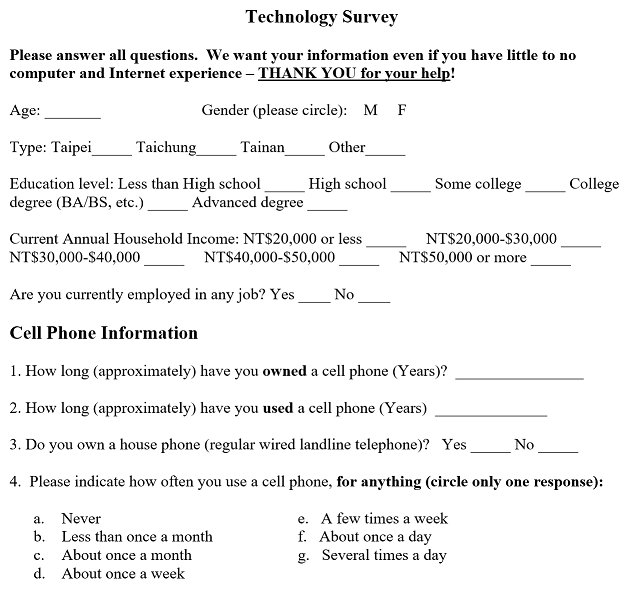

In [ ]:
# Load and inspect the data


In [ ]:
# Change columns to integer
